In [1]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset"

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:14<00:00, 19.8MB/s]
100% 2.70G/2.70G [02:14<00:00, 21.5MB/s]


In [5]:
!unzip '/content/new-plant-diseases-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.layers import Average
# from tensorflow.keras import Model

# # Load the pre-trained CNN model
# cnn_model = load_model('trained_plant_disease_model(CNN).keras')

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam

In [8]:
image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [9]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = "/content/test"

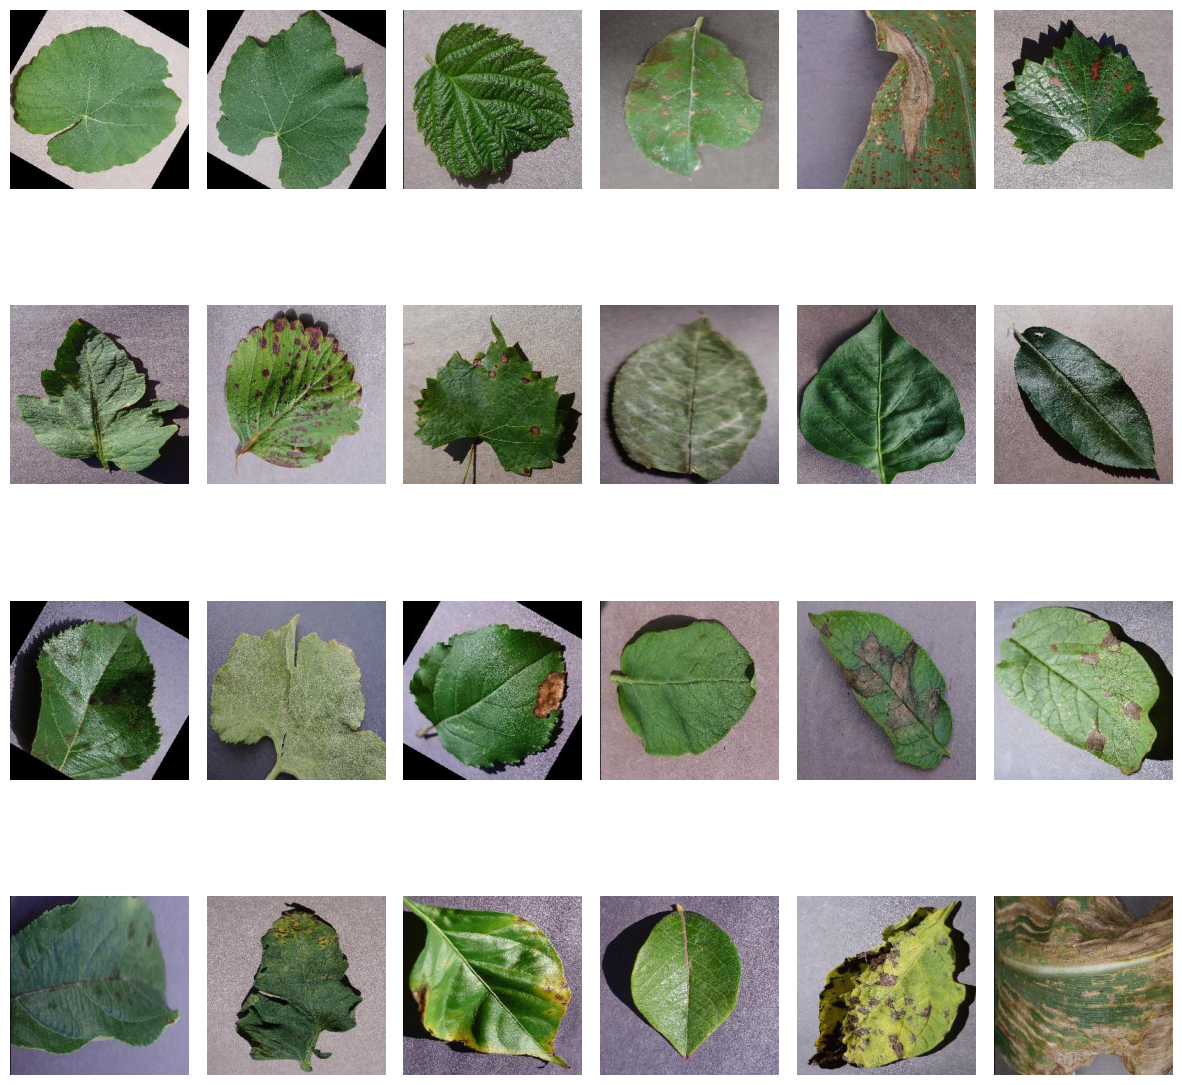

In [10]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [34]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [35]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [13]:
class_names = os.listdir(image_path)
print(class_names)

['Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_', 'Raspberry___healthy', 'Tomato___Septoria_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_mosaic_virus', 'Apple___Cedar_apple_rust', 'Peach___healthy', 'Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Apple___Apple_scab', 'Corn_(maize)___healthy', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Soybean___healthy', 'Peach___Bacterial_spot', 'Tomato___healthy', 'Tomato___Late_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Cherry_(including_sour)___healthy', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Tomato___Early_blight', 'Grape___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'

In [14]:
print("Number of classes : {}".format(len(class_names)))


Number of classes : 38


In [15]:
number_of_images = {}
for class_name in class_names:
    number_of_images[class_name] = len(os.listdir(image_path+"/"+class_name))

images_each_class = pd.DataFrame(list(number_of_images.items()), columns=['Class Name', 'Number of Images'])

<ipython-input-16-5265a1f170c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")


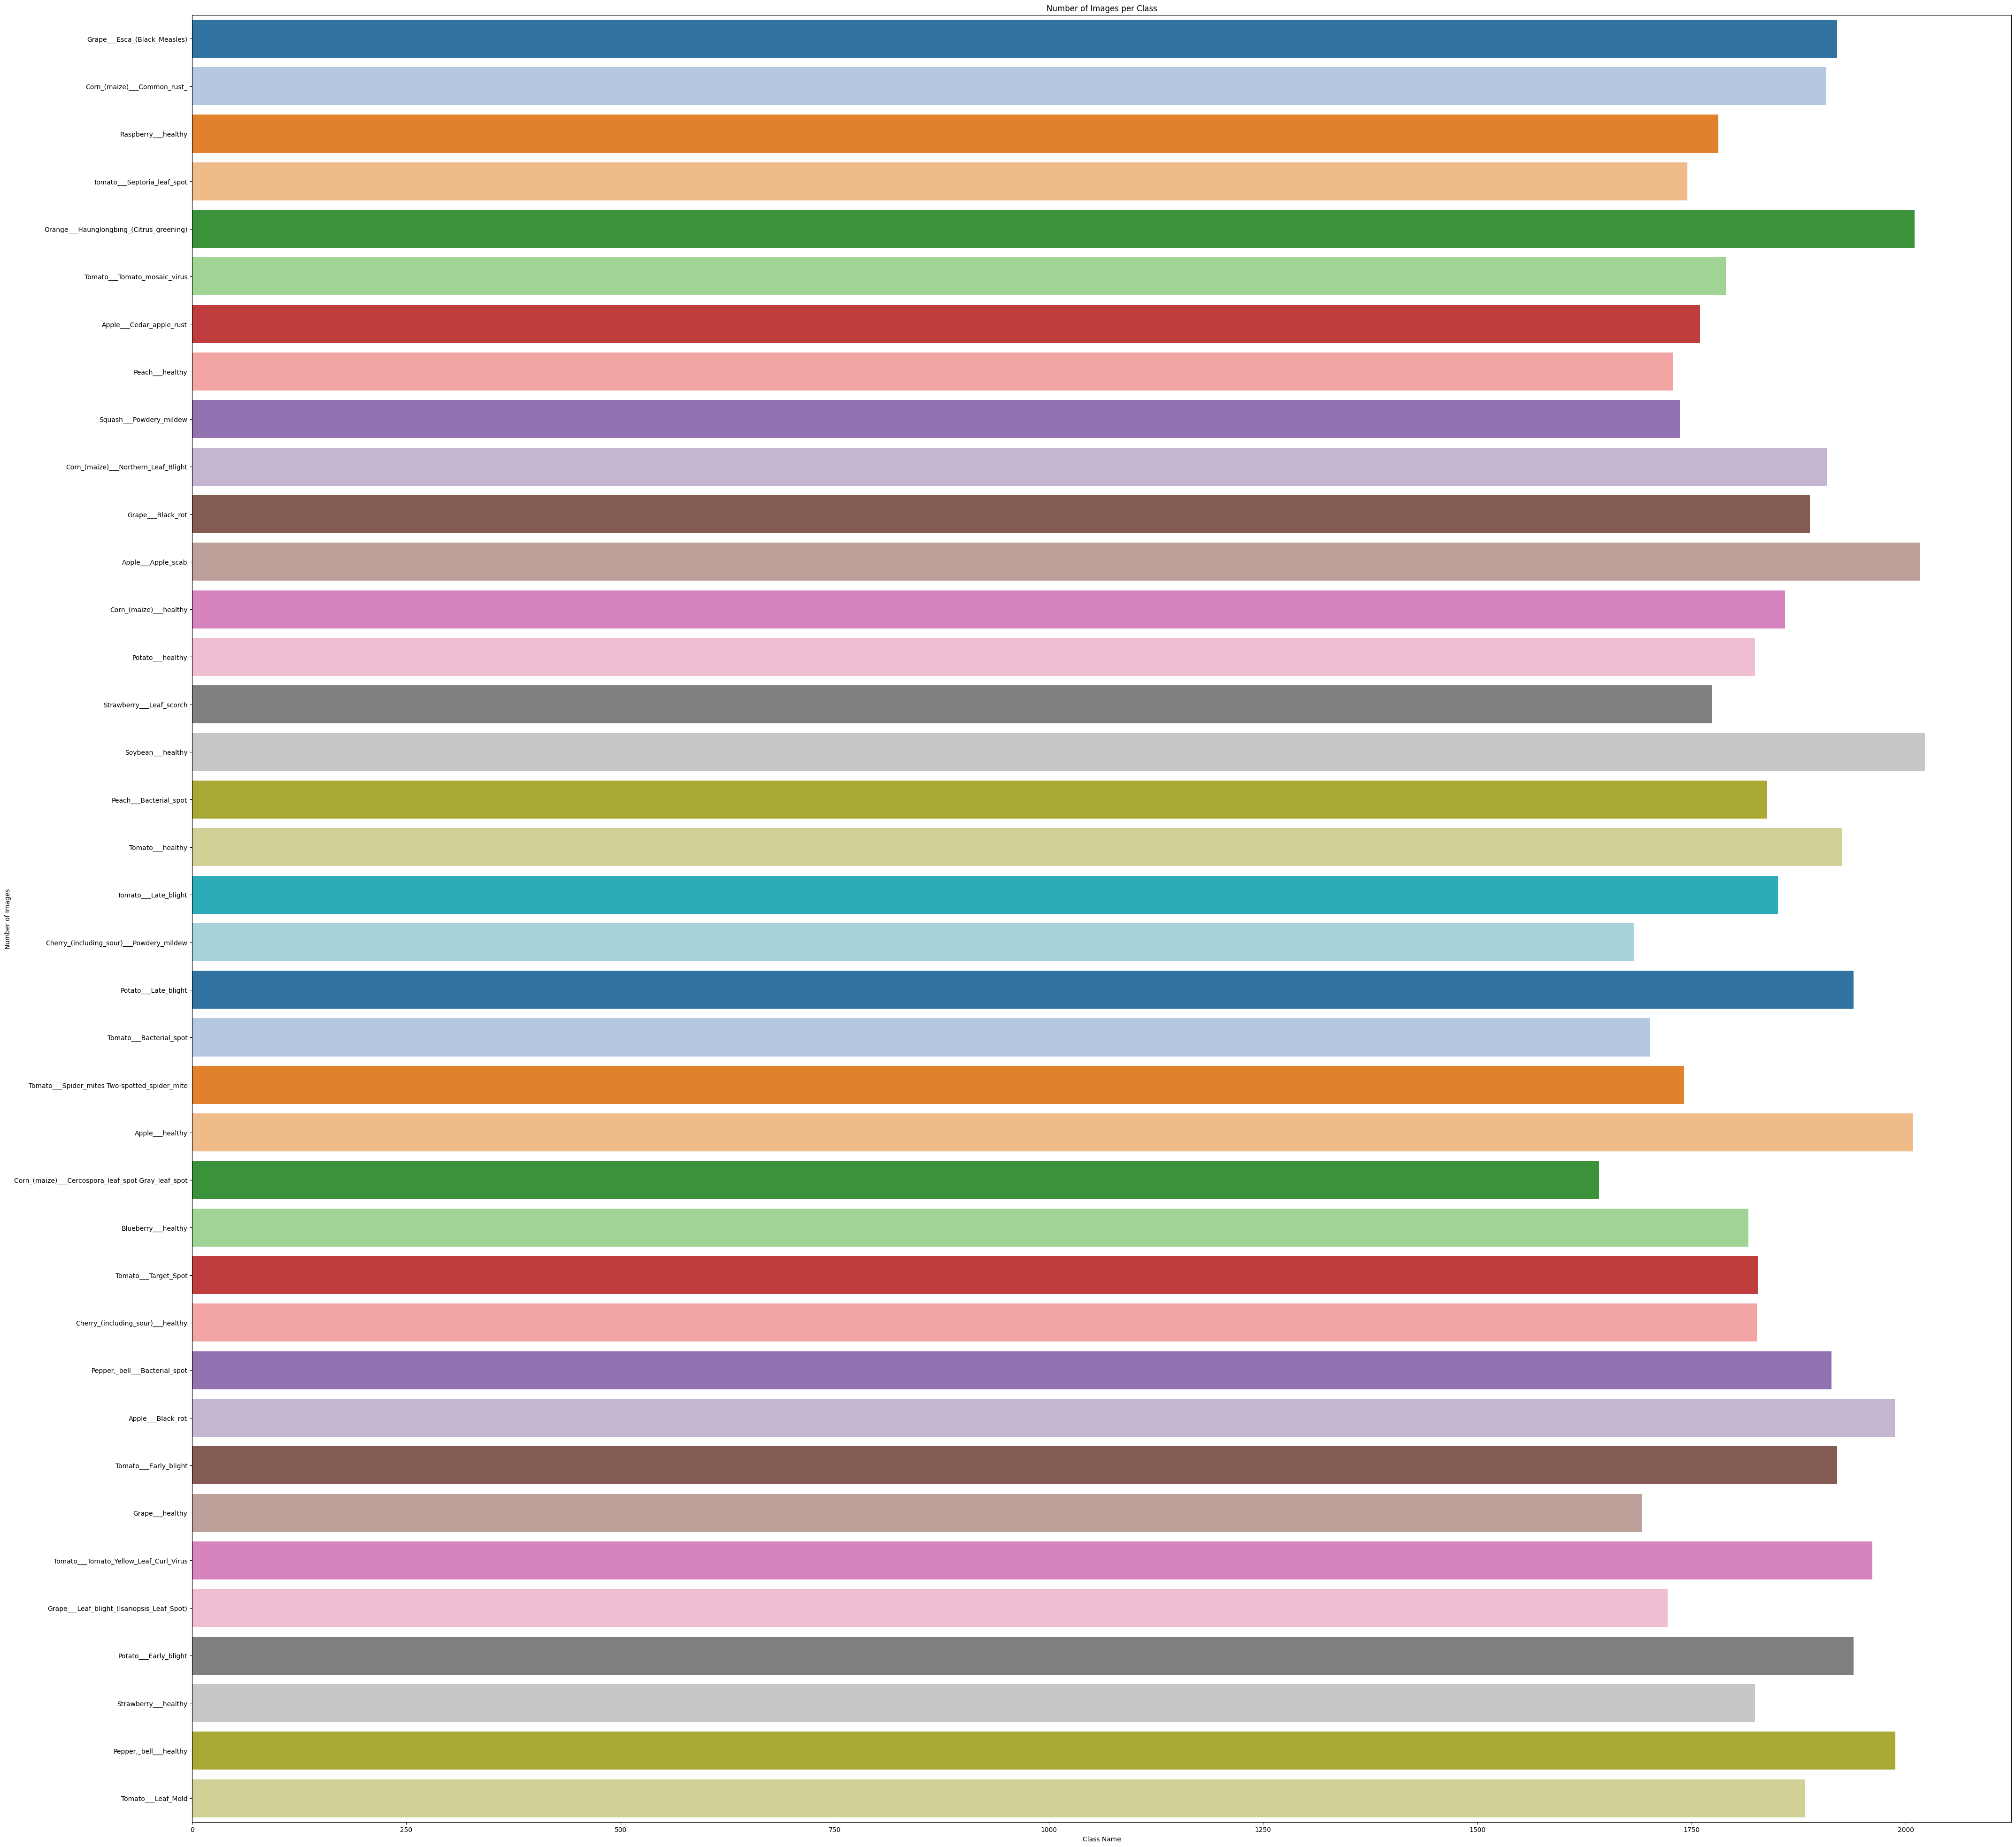

In [16]:
plt.figure(figsize=(50,50))
sns.barplot(y='Class Name', x='Number of Images', data=images_each_class,palette="tab20")
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.show()

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the model
vgg16_model = Sequential()

# Use Lambda to explicitly define the input shape
vgg16_model.add(Lambda(lambda x: x, input_shape=(224, 224, 3)))

# Load the VGG16 model without the top fully connected layers
pretrained_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze the base VGG16 model layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pretrained VGG16 model to our model
vgg16_model.add(pretrained_model)

# Add GlobalAveragePooling2D to replace Flatten
vgg16_model.add(GlobalAveragePooling2D())

# Add fully connected layers
vgg16_model.add(Dense(units=1500, activation='relu'))
vgg16_model.add(Dropout(0.4))  # Dropout to prevent overfitting

# Output layer (assuming 38 classes for plant disease classification)
vgg16_model.add(Dense(units=38, activation='softmax'))

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
vgg16_model.summary()

# Train the model
history = vgg16_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,541,226 (59.29 MB)

 Trainable params: 826,538 (3.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 379s 165ms/step - accuracy: 0.6310 - loss: 1.5882 - val_accuracy: 0.9364 - val_loss: 0.2055
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 358s 163ms/step - accuracy: 0.9197 - loss: 0.2525 - val_accuracy: 0.9556 - val_loss: 0.1398
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 359s 163ms/step - accuracy: 0.9455 - loss: 0.1678 - val_accuracy: 0.9604 - val_loss: 0.1199
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 368s 157ms/step - accuracy: 0.9586 - loss: 0.1255 - val_accuracy: 0.9636 - val_loss: 0.1094
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 383s 157ms/step - accuracy: 0.9668 - loss: 0.0982 - val_accuracy: 0.9695 - val_loss: 0.0925
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 393s 162ms/step - accuracy: 0.9739 - loss: 0.0793 - val_accuracy: 0.9693 - val_loss: 0.0889
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 369s 157ms/step - accuracy: 0.9787 - loss: 0.0649 - val_accuracy: 0.9712 - val_loss: 0.0834
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 394s 162ms/step - ac

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import VGG16

# # Initialize the model
# vgg16_model = Sequential()

# # Load the VGG16 model without the top fully connected layers
# pretrained_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# # Freeze the base VGG16 model layers
# for layer in pretrained_model.layers:
#     layer.trainable = False

# # Add the pretrained VGG16 model to our model
# vgg16_model.add(pretrained_model)

# # Add GlobalAveragePooling2D to replace Flatten
# vgg16_model.add(GlobalAveragePooling2D())

# # Add fully connected layers
# vgg16_model.add(Dense(units=1500, activation='relu'))
# vgg16_model.add(Dropout(0.4))  # Dropout to prevent overfitting

# # Output layer (assuming 38 classes for plant disease classification)
# vgg16_model.add(Dense(units=38, activation='softmax'))

# # Compile the model
# vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# vgg16_model.summary()

# # Train the model
# history = vgg16_model.fit(
#     training_set,
#     validation_data=validation_set,
#     epochs=10
# )

# # Training set Accuracy
# train_loss, train_acc = vgg16_model.evaluate(training_set)
# print('Training accuracy:', train_acc)


In [41]:
#Training set Accuracy
train_loss, train_acc = vgg16_model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 281s 128ms/step - accuracy: 0.9941 - loss: 0.0208
Training accuracy: 0.9947506785392761


In [42]:
#Validation set Accuracy
val_loss, val_acc = vgg16_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 71s 128ms/step - accuracy: 0.9738 - loss: 0.0761
Validation accuracy: 0.9749032258987427


In [43]:
vgg16_model.save('VGG16_trained_plant_disease_model.keras')


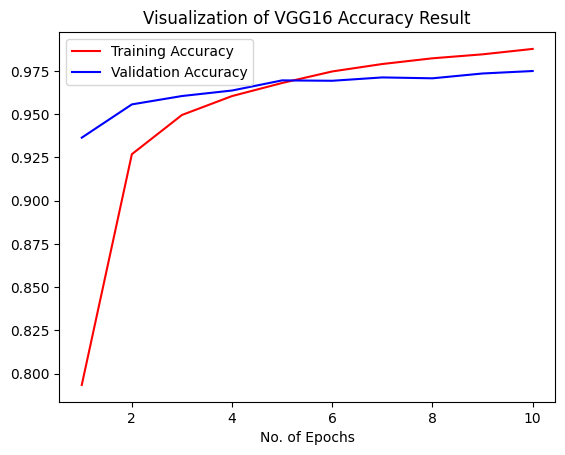

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of VGG16 Accuracy Result')
plt.legend()
plt.show()

In [47]:
class_name = validation_set.class_names

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [51]:
y_pred = vgg16_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 145s 8ms/step


In [52]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [53]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [54]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [56]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.96      1.00      0.98       440
                                   Apple___healthy       0.96      0.99      0.98       502
                               Blueberry___healthy       1.00      0.99      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

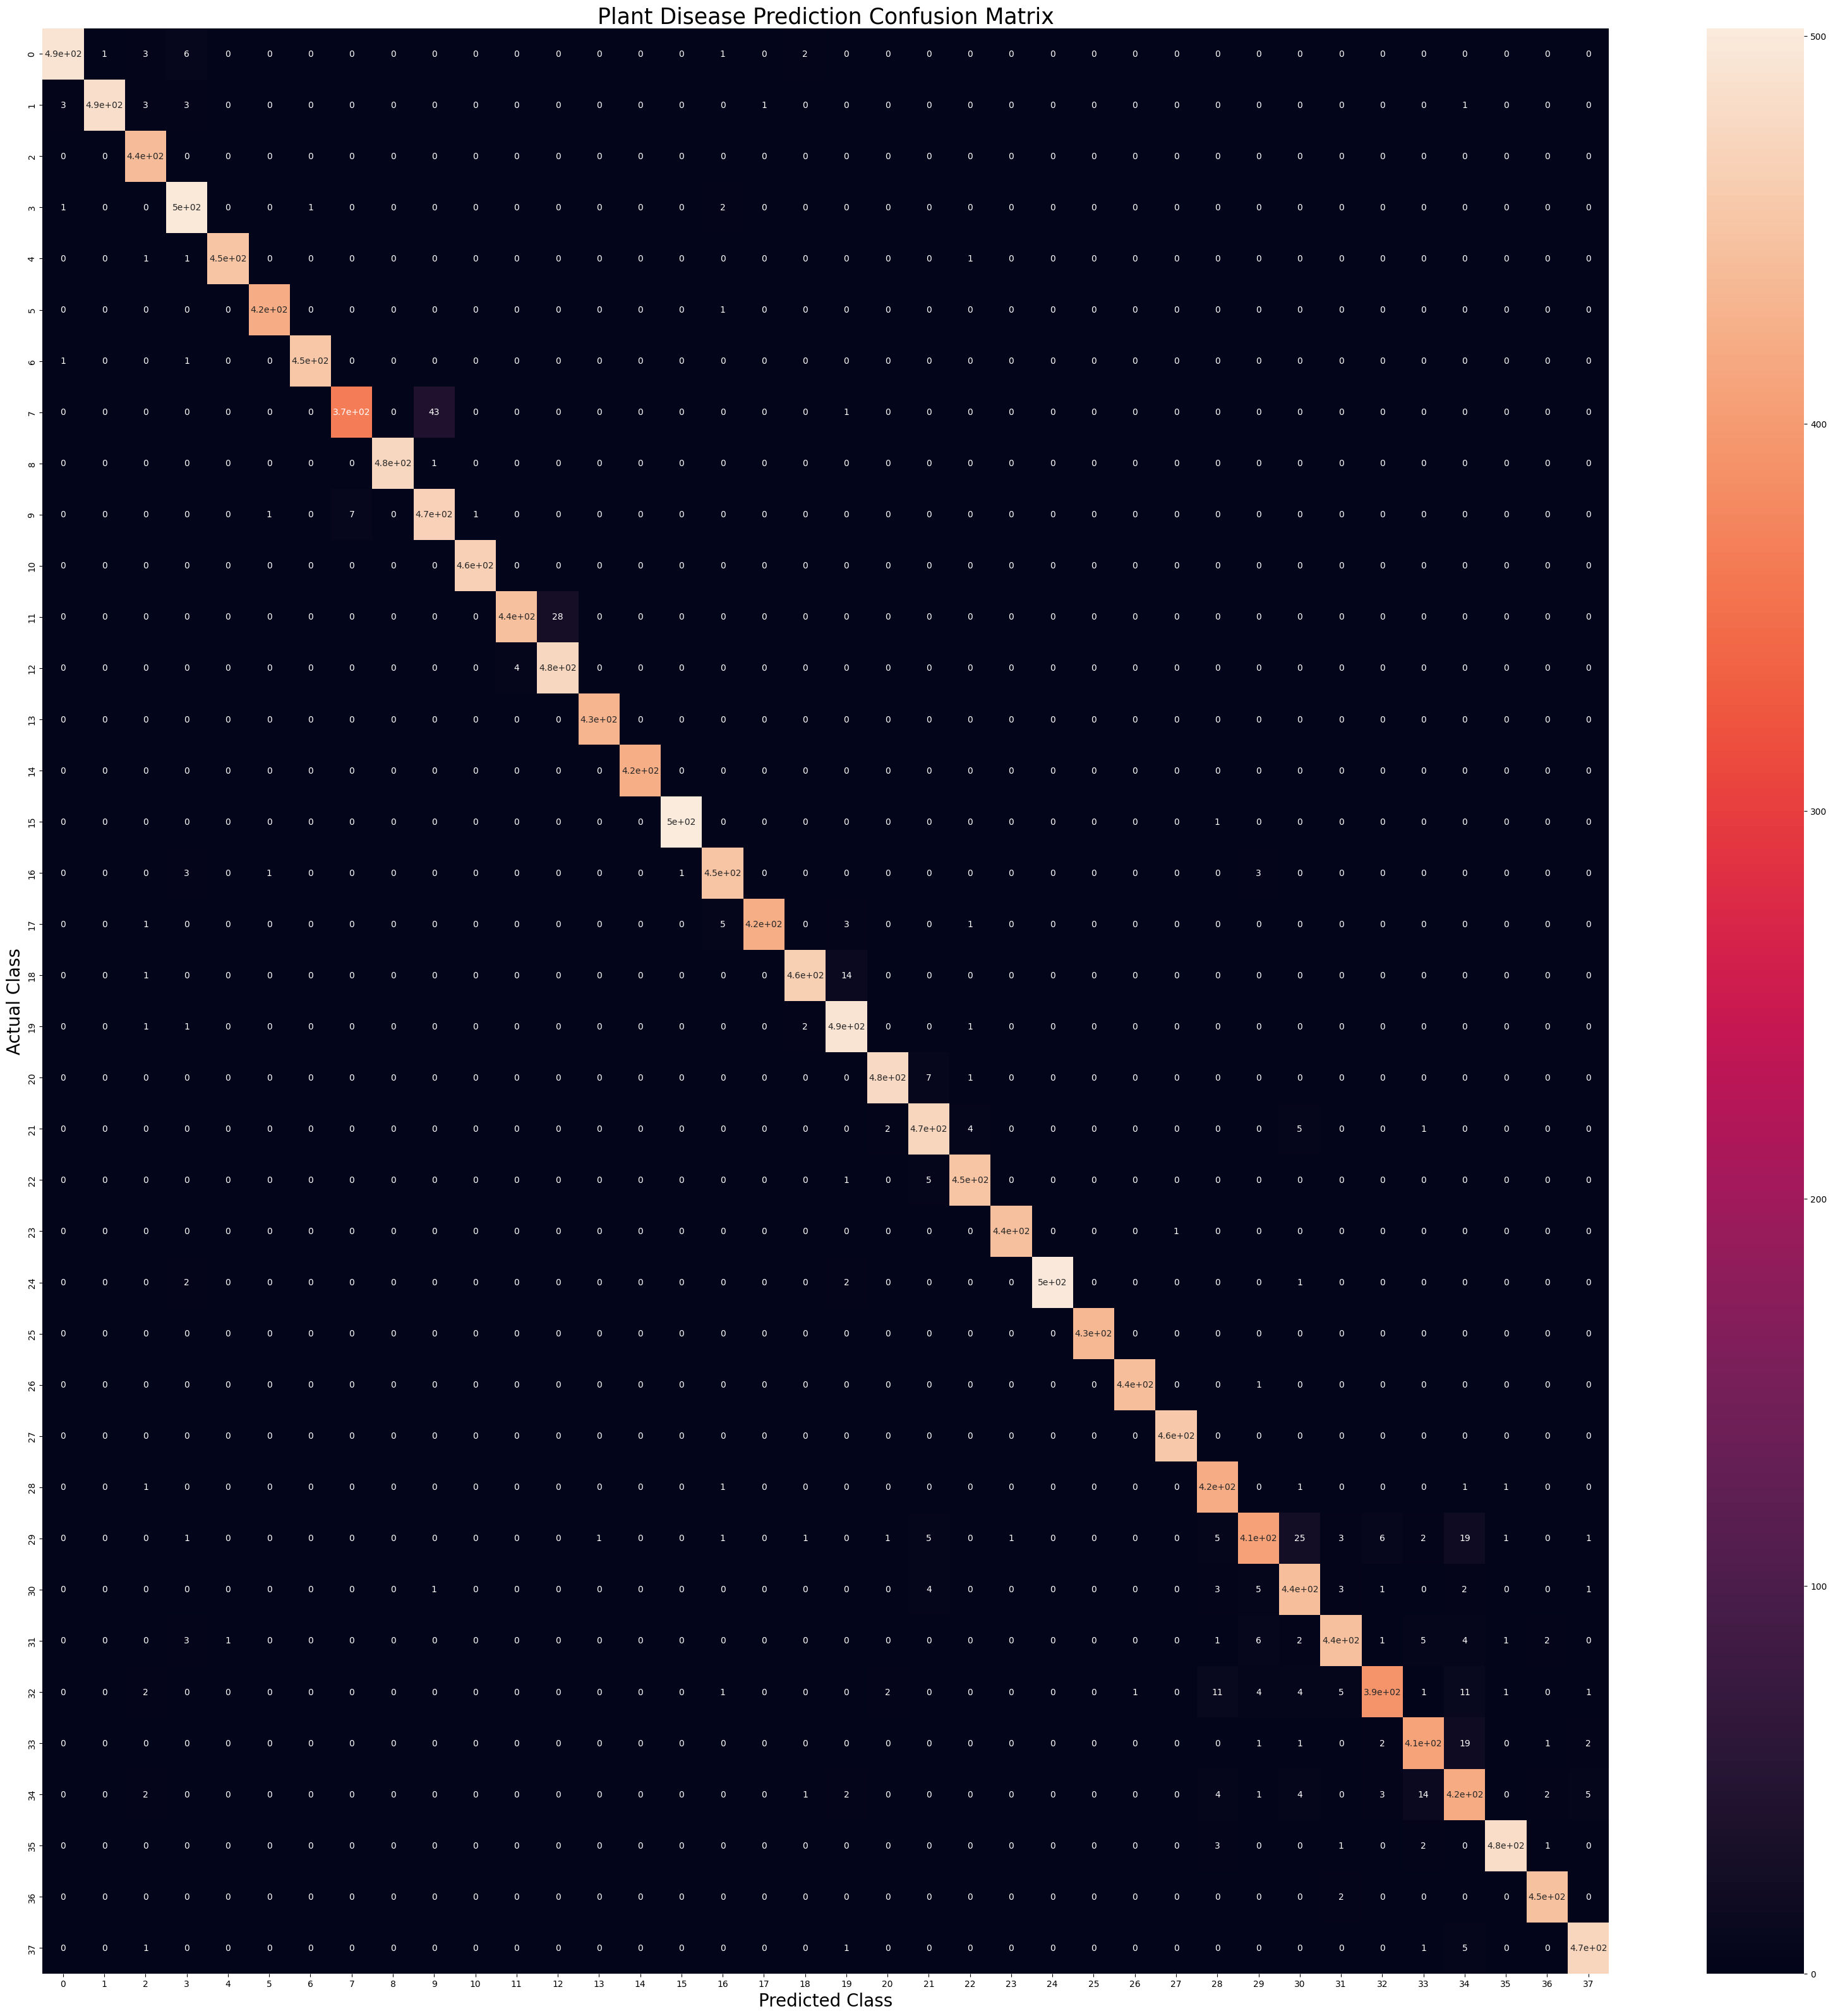

In [57]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [62]:
##Plotting the curves
# Get true labels and predicted probabilities
y_pred = vgg16_model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

num_classes = len(class_name)
# True labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert true labels to one-hot encoding for multiclass ROC
Y_true_one_hot = label_binarize(Y_true, classes=range(num_classes))

# ROC Curve for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f"Class {class_name[i]} (AUC = {roc_auc[i]:.2f})")
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multiclass ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Precision-Recall Curve for each class
# precision = dict()
# recall = dict()
# prc_auc = dict()
# for i in range(num_classes):
#     precision[i], recall[i], _ = precision_recall_curve(Y_true_one_hot[:, i], y_pred[:, i])
#     prc_auc[i] = auc(recall[i], precision[i])

# # Plot Precision-Recall curve for each class
# plt.figure(figsize=(10, 7))
# for i in range(num_classes):
#     plt.plot(recall[i], precision[i], label=f"Class {class_name[i]} (AUC = {prc_auc[i]:.2f})")
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Multiclass Precision-Recall Curve')
# plt.legend(loc="lower left")
# plt.show()

# Print classification report for detailed metrics
print(classification_report(Y_true, predicted_categories, target_names=class_name))


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.96      1.00      0.98       440
                                   Apple___healthy       0.96      0.99      0.98       502
                               Blueberry___healthy       1.00      0.99      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___No

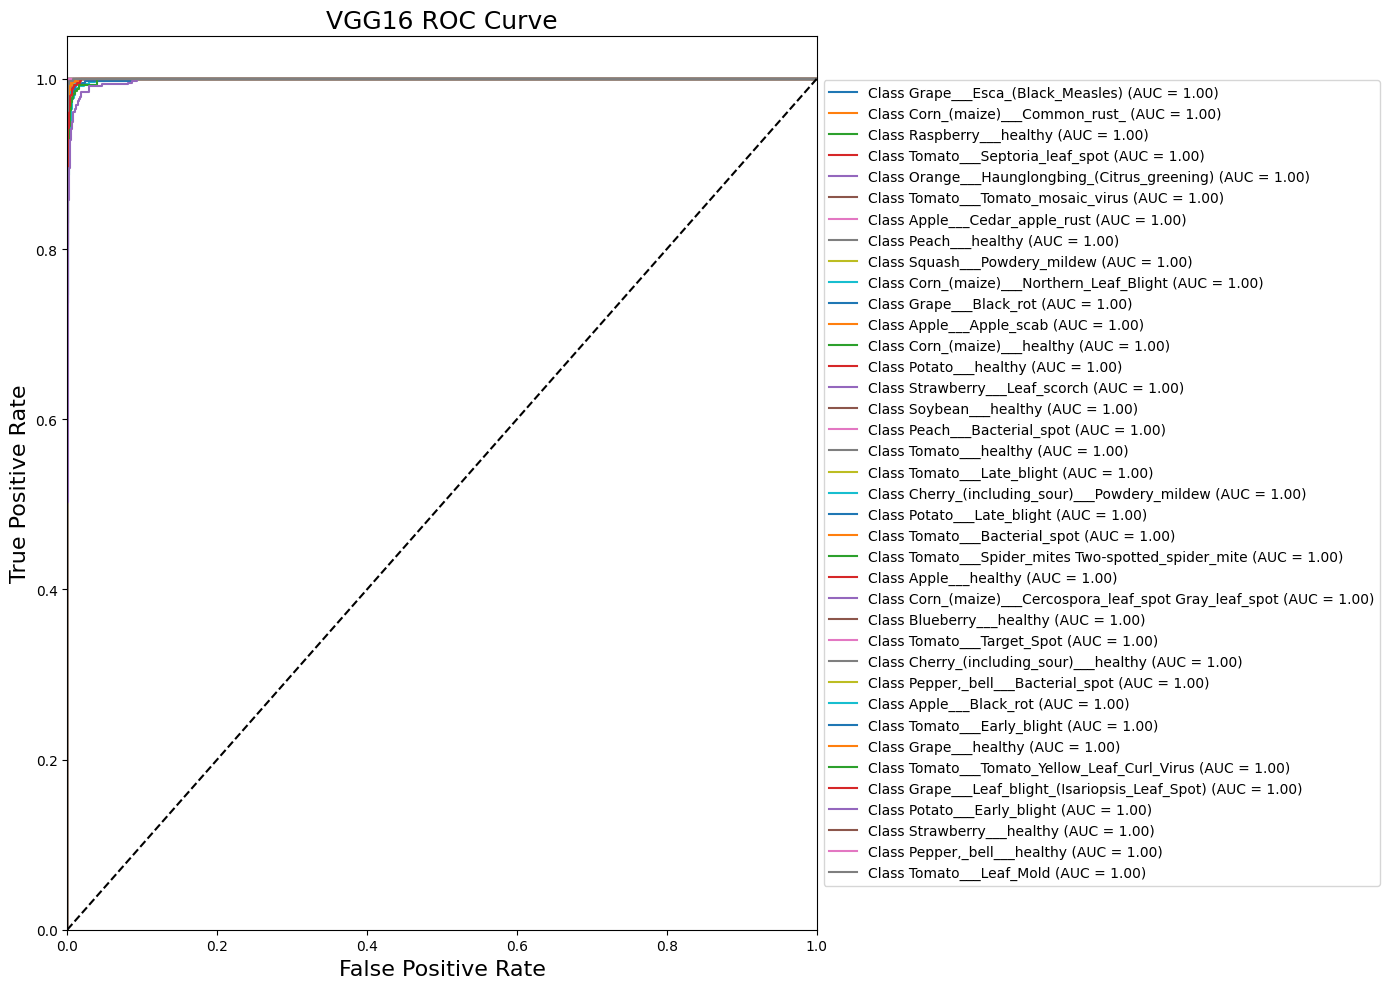

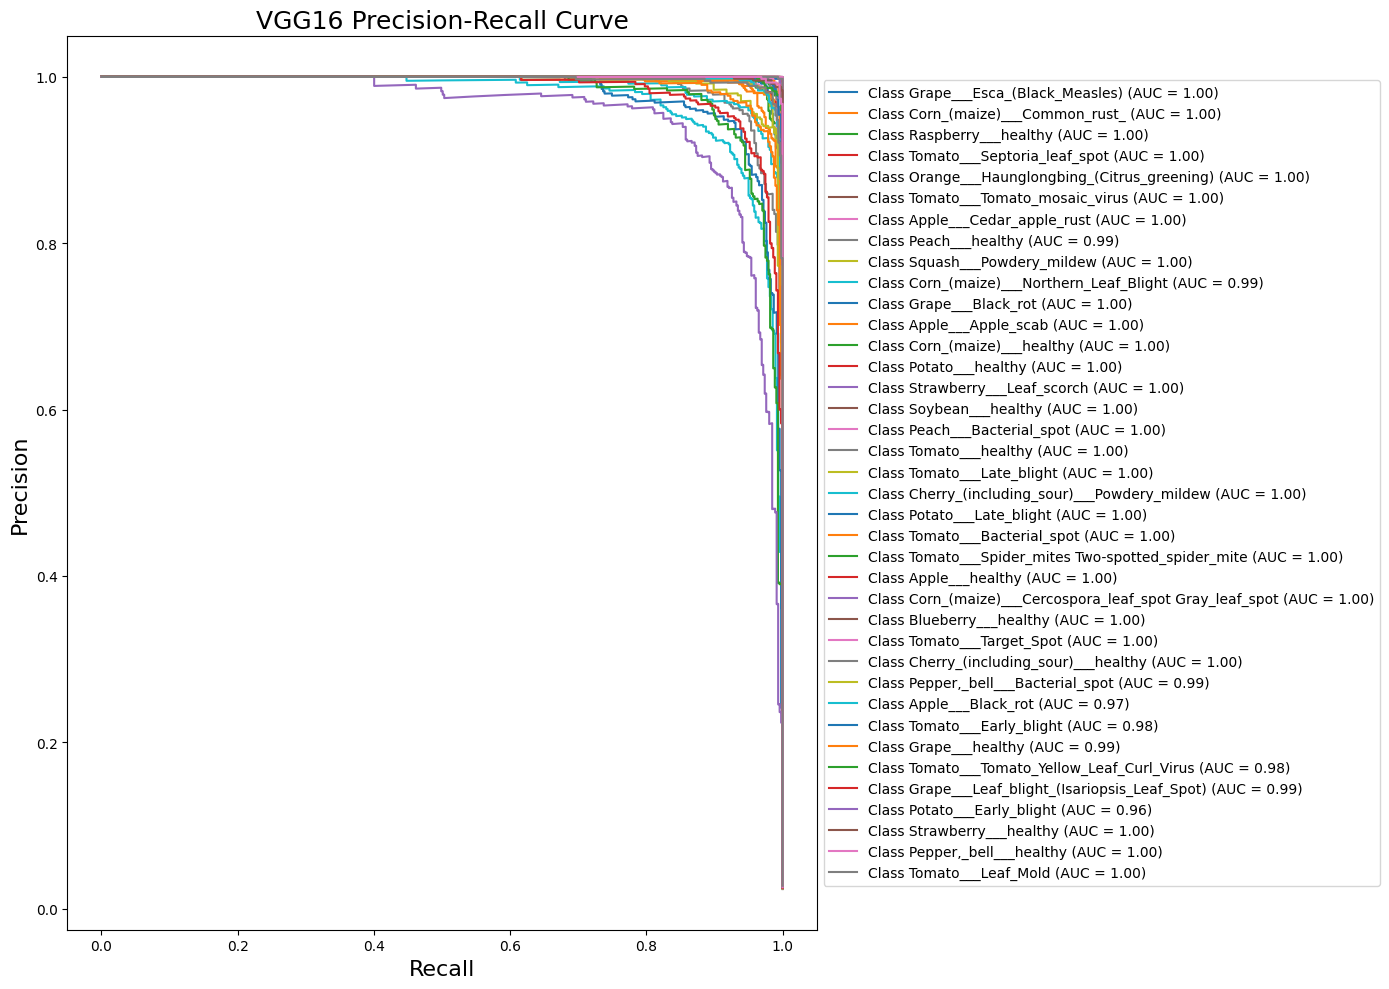

In [64]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming you have these:
# y_true: true labels
# y_pred: predicted probabilities

num_classes = len(class_names)

# Binarize the labels (one-vs-rest approach)
y_true_bin = label_binarize(Y_true, classes=range(num_classes))

# Compute precision-recall and ROC for each class
precision = dict()
recall = dict()
prc_auc = dict()  # For precision-recall curve AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    prc_auc[i] = average_precision_score(y_true_bin[:, i], y_pred[:, i])

    # ROC curve
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('VGG16 ROC Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {class_names[i]} (AUC = {prc_auc[i]:.2f})")

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('VGG16 Precision-Recall Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


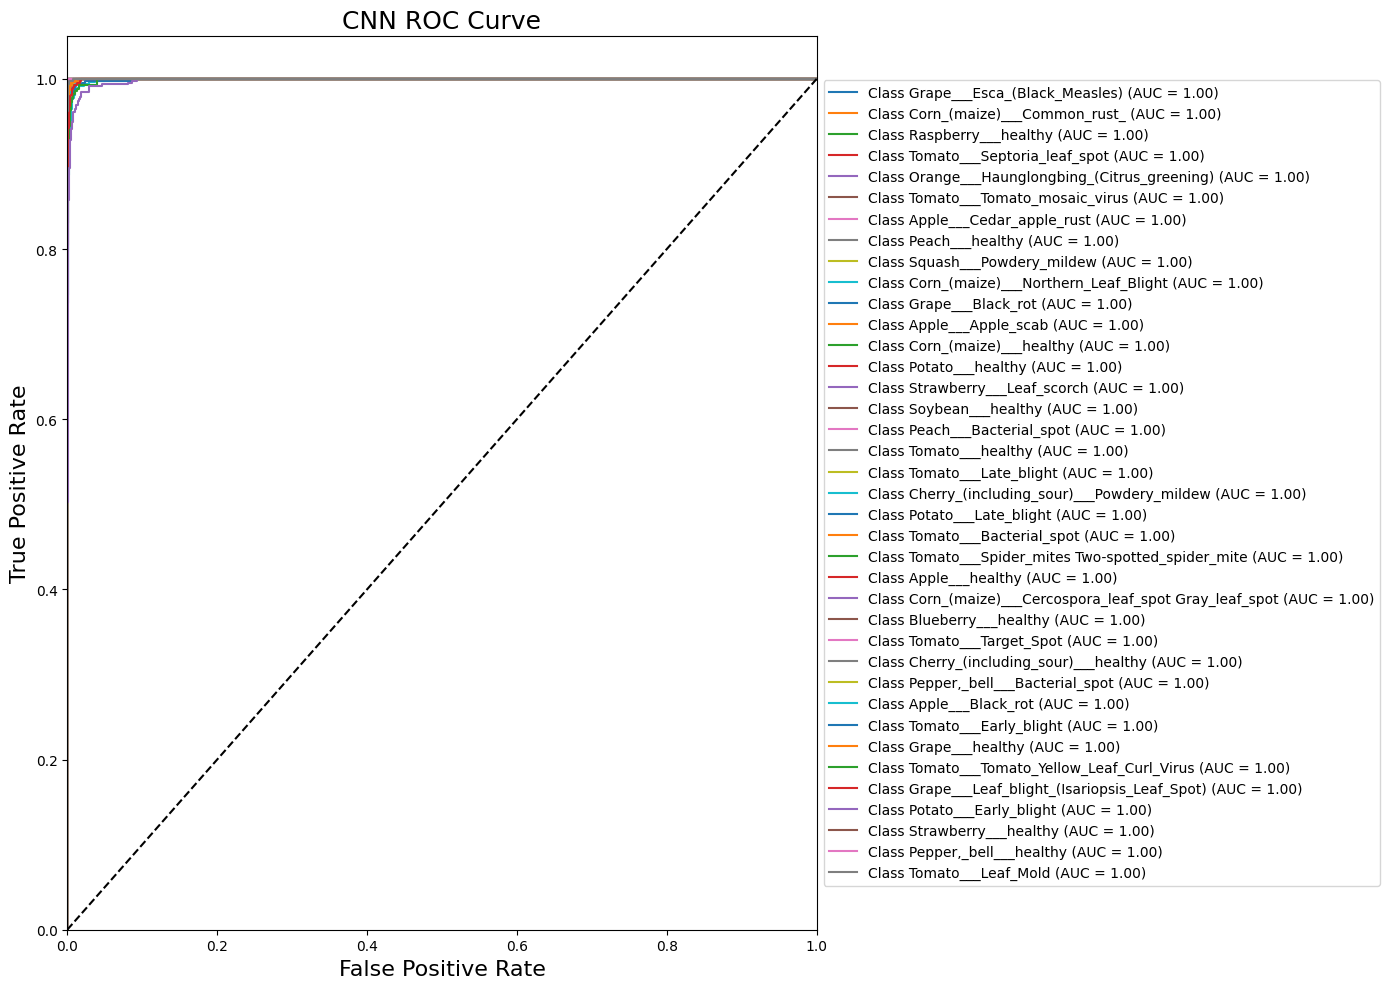

In [65]:
# Plot ROC Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('CNN ROC Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('VGG16_roc_curve.png', dpi=600)

plt.show()


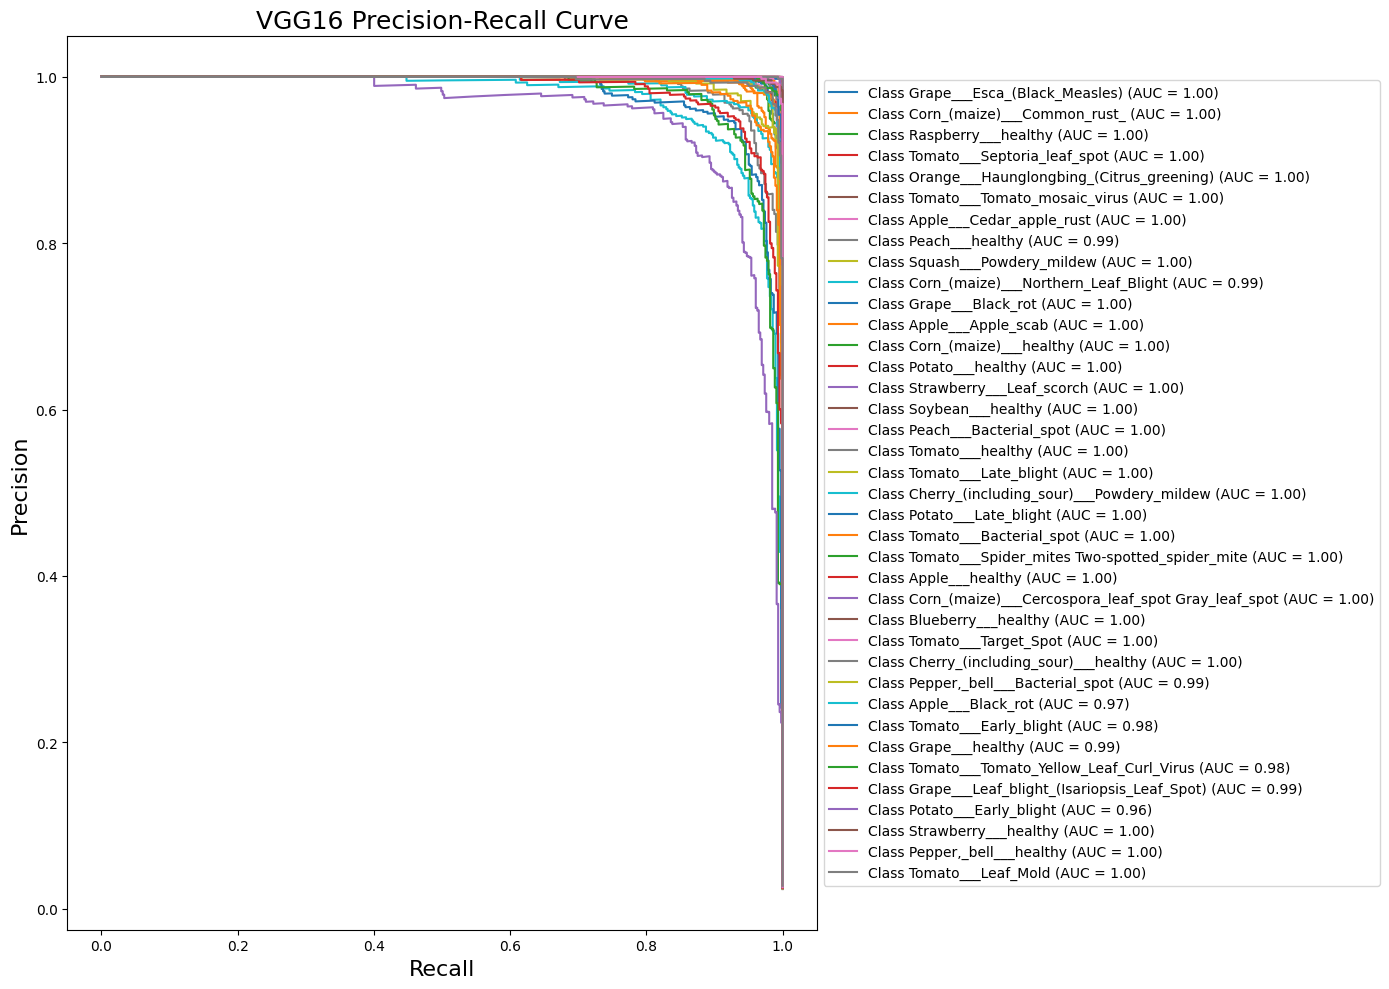

In [68]:
# Plot Precision-Recall Curve
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {class_names[i]} (AUC = {prc_auc[i]:.2f})")

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('VGG16 Precision-Recall Curve', fontsize=18)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('VGG16_precision_recall_curve.png', dpi=600)

plt.show()


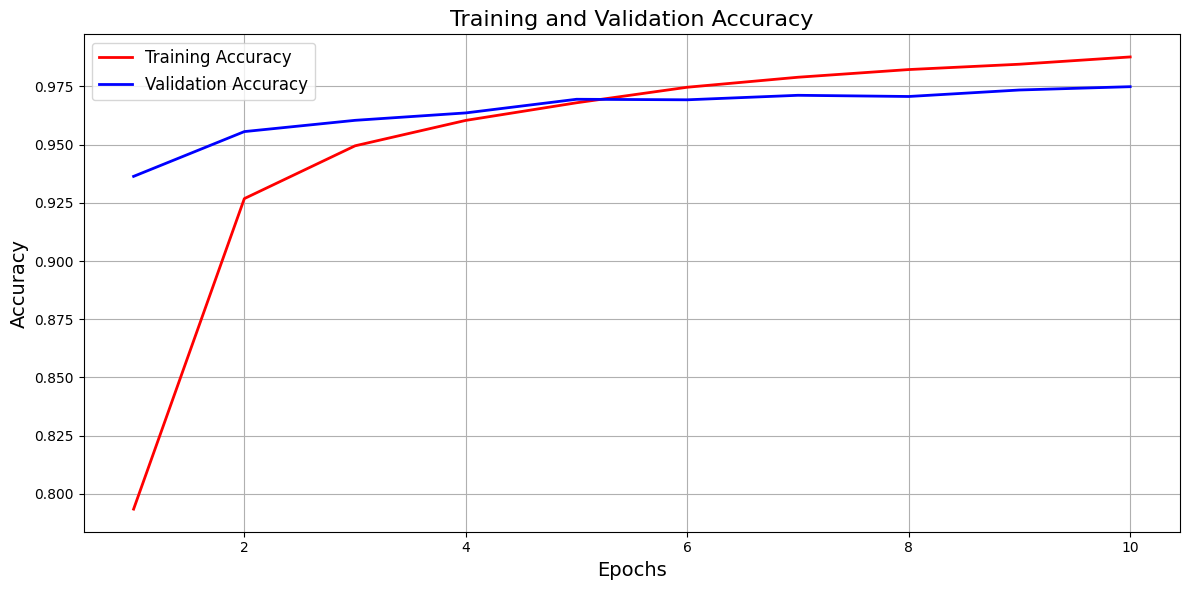

In [70]:
# Assuming training_history contains 'accuracy', 'val_accuracy', 'loss', and 'val_loss'
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Accuracy', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('VGG16_Training_VS_Validation_Accuracy.png', dpi=600)
plt.show()




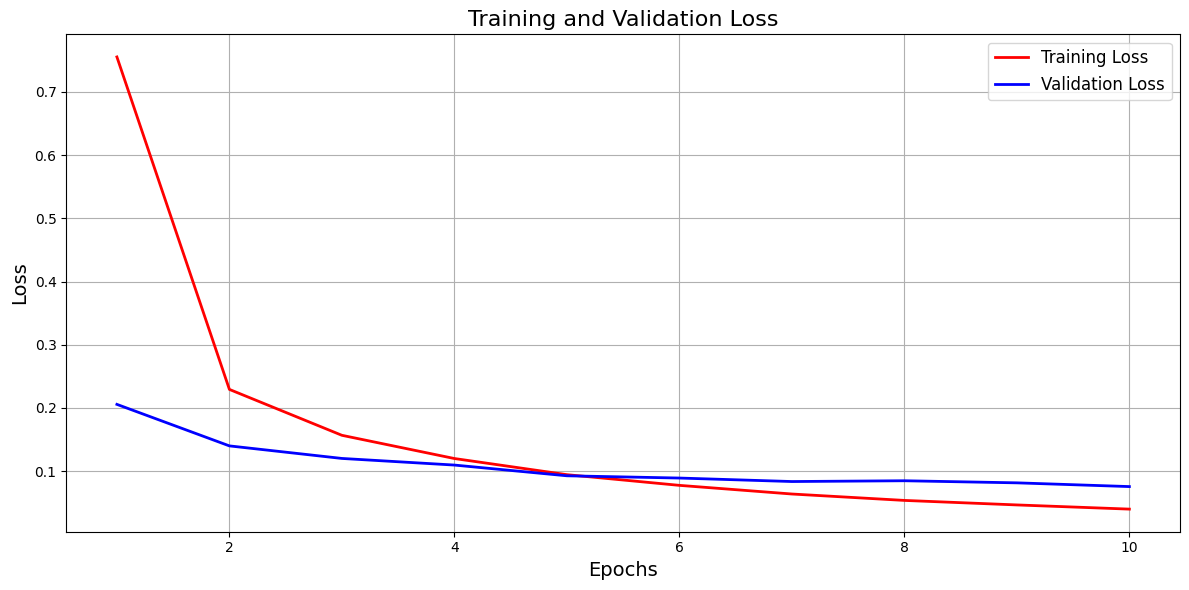

In [72]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs,history.history['loss'], 'r', label='Training Loss', linewidth=2)
plt.plot(epochs,history.history['val_loss'], 'b', label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('VGG16_Training_VS_Validation_LOSS.png', dpi=600)
plt.show()